# Assignment 2: Data analysis - results and covid_data 

Ali Baligh-900211718 

# Contents

# 1. Results data description

# 2.Variables Description 

# 3.Covid_data data description

# 4. Variables Description

# 5. Part 1a : The probability of winning or losing 

# 6. Part 1b: Comparing confidence intervals.

# 7. Part 1c: Graphs

# 8. Part 1d: Description of the results.

# 9. Part 2a:  reported number of confirmed cases and deaths.

# 10. Part 2b: ratio between the confirmed cases and deaths.

# 11. Part 2c: Analysis of CoronaVirus Pandemic Over the Period Between 2020 and 2021

# 12. Part 2d: Description of the results. 

# Results data description

In this python notebook, I will analyze the probability of winning/losing of the countries in the different tournaments  in the dataset results.csv by using statistics, visuals, and graphs. I will study the probabilities in terms of several factors (playing at home/away). I would also compare confidence intervals and draw the corresponding graphs. This data is includes 43,170 results of international football matches starting from the very first official match in 1872 up to 2019. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men’s full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation’s
B-team, U-23 or a league select team. 

# Variables Description

date - date of the match

• home_team - the name of the home team

• away_team - the name of the away team

• home_score - full-time home team score including extra time, not including penaltyshootouts

• away_score - full-time away team score including extra time, not including penaltyshootouts

• tournament - the name of the tournament

• city - the name of the city/town/administrative unit where the match was played

• country - the name of the country where the match was played

• neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue



# Covid_data data description

In this python notebook, I will analyze the daily reported number of cases and deaths, the case fatality rate (the ratio between deaths and cases) from COVID-19 by using statistics, visuals, and graphs. I will Compare between 2020 and 2021 and compare between regions, income, and continents). The dataset in covid_data.csv includes the records of two years 2020 and 2021 in the countries affected by the COVID-19 pandemic.

# Variables Description

• date- the date

• iso3c- the country code

• country- country name

• income- Income group according WB classification

• region- Geographical region according WB classification

• continent- the name of the continent

• dcases- the reported daily cases

• ddeaths- the reported daily deaths

• population- population size of the country in 2019

• weekdays- weekdays

• month- months


# Imports 

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pylab import *

In [4]:
import statistics

In [5]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [6]:
from pandas.api.types import CategoricalDtype

In [7]:
import scipy.stats as st

# Part 1a: probability of winning or losing

In [250]:
df=pd.read_csv('results.csv',encoding='latin-1')

In [251]:
df.head(11)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


Here, the dataset is shown with 10 objects.

In order to calculate the countries probability of winning or losing, I created a data frame with some several factors that could affect the winning or lose of a country.  

In [252]:
df1=pd.DataFrame(df.home_team)

In [253]:
df1=df1.assign(away_team=df["away_team"])

In [254]:
df1=df1.assign(country=df["country"])

In [255]:
df1=df1.assign(neutral=df["neutral"])

In [256]:
df1=df1.assign(tournament=df["tournament"])

In [257]:
goal_home=df['home_score']-df['away_score']

In [258]:
goal_away=df['home_score']-df['away_score']

In [328]:
conditions=[goal_home<0,goal_home==0,goal_home>0]
choices=['lose','draw','win']
df1['match_result_home'] = np.select(conditions,choices)

In [329]:
conditions2=[goal_away>0,goal_away==0,goal_away<0]
choices2=['lose','draw','win']
df1['match_result_away'] = np.select(conditions2,choices2)

In [261]:
df1['match_result_home'] = np.select(conditions,choices)

In [262]:
df1['match_result_away'] = np.select(conditions2,choices2)

In [330]:
df1

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
0,Scotland,England,Scotland,False,Friendly,draw,draw
1,England,Scotland,England,False,Friendly,win,lose
2,Scotland,England,Scotland,False,Friendly,win,lose
3,England,Scotland,England,False,Friendly,draw,draw
4,Scotland,England,Scotland,False,Friendly,win,lose
...,...,...,...,...,...,...,...
43183,Suriname,Guyana,Suriname,False,Friendly,win,lose
43184,Burkina Faso,Senegal,Cameroon,True,African Cup of Nations,lose,win
43185,Cameroon,Egypt,Cameroon,False,African Cup of Nations,draw,draw
43186,Cameroon,Burkina Faso,Cameroon,False,African Cup of Nations,draw,draw


Here I created a Data frame which if a home team scores more goals, it is a win and if they score less, its a less. Same vice versa for the away team

In [264]:
df1[df1["match_result_home"]=="win"]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
1,England,Scotland,England,False,Friendly,win,lose
2,Scotland,England,Scotland,False,Friendly,win,lose
4,Scotland,England,Scotland,False,Friendly,win,lose
5,Scotland,Wales,Scotland,False,Friendly,win,lose
8,Scotland,England,Scotland,False,Friendly,win,lose
...,...,...,...,...,...,...,...
43177,Egypt,Morocco,Cameroon,True,African Cup of Nations,win,lose
43178,Senegal,Equatorial Guinea,Cameroon,True,African Cup of Nations,win,lose
43179,Bahrain,DR Congo,Bahrain,False,Friendly,win,lose
43181,Nepal,Mauritius,Nepal,False,Friendly,win,lose


Here in the data frame. It shows that from the 43188 matchs played, 21009 won if the countries were playing as a home team. So the probability of a Country winning if it was playing as a home team is 0.4865

In [265]:
df1[df1["match_result_away"]=="win"]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
6,England,Scotland,England,False,Friendly,lose,win
7,Wales,Scotland,Wales,False,Friendly,lose,win
12,Wales,Scotland,Wales,False,Friendly,lose,win
14,Wales,England,Wales,False,Friendly,lose,win
16,England,Wales,England,False,Friendly,lose,win
...,...,...,...,...,...,...,...
43153,Sierra Leone,Equatorial Guinea,Cameroon,True,African Cup of Nations,lose,win
43159,Nigeria,Tunisia,Cameroon,True,African Cup of Nations,lose,win
43161,Guinea,Gambia,Cameroon,True,African Cup of Nations,lose,win
43180,Kuwait,Libya,Kuwait,False,Friendly,lose,win


Here in the data frame. It shows that from the 43188 matchs played, 12224 won if the countries were playing as an away team. Meaning the probability of a country winning as an away team is 0.28304

In [266]:
print(df1[df1["home_team"]==df1["country"]].shape)
df1[(df1["match_result_home"]=="win")&(df1["home_team"]==df1["country"])]

(31682, 7)


,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
1,England,Scotland,England,False,Friendly,win,lose
2,Scotland,England,Scotland,False,Friendly,win,lose
4,Scotland,England,Scotland,False,Friendly,win,lose
5,Scotland,Wales,Scotland,False,Friendly,win,lose
8,Scotland,England,Scotland,False,Friendly,win,lose
...,...,...,...,...,...,...,...
43175,Cameroon,Gambia,Cameroon,False,African Cup of Nations,win,lose
43176,Indonesia,Timor-Leste,Indonesia,False,Friendly,win,lose
43179,Bahrain,DR Congo,Bahrain,False,Friendly,win,lose
43181,Nepal,Mauritius,Nepal,False,Friendly,win,lose


Here it shows that when a home team played in their own country, they played 31682 times and won a toral of 16009 so the prob of winning is 0.5053

In [267]:
print(df1[(df1["match_result_home"]=="lose")&(df1["home_team"]==df1["country"])].shape)

(8311, 7)


and the prob of losing would be 0.2623 since they played 31682 times and only lost 8311 times. 

In [268]:
print(df1[df1["away_team"]==df1["country"]].shape)
df1[(df1["match_result_away"]=="win")&(df1["away_team"]==df1["country"])]

(8, 7)


,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
788,Catalonia,Spain,Spain,False,Friendly,lose,win
1618,Silesia,Poland,Poland,False,Friendly,lose,win
1650,Catalonia,Spain,Spain,False,Friendly,lose,win
3488,Silesia,Poland,Poland,False,Friendly,lose,win
3528,Catalonia,Spain,Spain,False,Friendly,lose,win


Here in the data frame. It shows that from the 8 matchs played as an away team in their own country, 5 won meaning the probability of winning is 0.625

In [269]:
print(df1[(df1["match_result_away"]=="lose")&(df1["away_team"]==df1["country"])].shape)

(1, 7)


and the prob of losing is 0.125 since they only lost once.

In [270]:
df1[df1["match_result_home"]=="lose"]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
6,England,Scotland,England,False,Friendly,lose,win
7,Wales,Scotland,Wales,False,Friendly,lose,win
12,Wales,Scotland,Wales,False,Friendly,lose,win
14,Wales,England,Wales,False,Friendly,lose,win
16,England,Wales,England,False,Friendly,lose,win
...,...,...,...,...,...,...,...
43153,Sierra Leone,Equatorial Guinea,Cameroon,True,African Cup of Nations,lose,win
43159,Nigeria,Tunisia,Cameroon,True,African Cup of Nations,lose,win
43161,Guinea,Gambia,Cameroon,True,African Cup of Nations,lose,win
43180,Kuwait,Libya,Kuwait,False,Friendly,lose,win


Here in the data frame. It shows that from the 43188 matchs played, 12224 lost if the countries were playing as a home team. So the probability of a Country losing if it was playing as a home team is 0.28304

In [271]:
df1[df1["match_result_away"]=="lose"]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
1,England,Scotland,England,False,Friendly,win,lose
2,Scotland,England,Scotland,False,Friendly,win,lose
4,Scotland,England,Scotland,False,Friendly,win,lose
5,Scotland,Wales,Scotland,False,Friendly,win,lose
8,Scotland,England,Scotland,False,Friendly,win,lose
...,...,...,...,...,...,...,...
43177,Egypt,Morocco,Cameroon,True,African Cup of Nations,win,lose
43178,Senegal,Equatorial Guinea,Cameroon,True,African Cup of Nations,win,lose
43179,Bahrain,DR Congo,Bahrain,False,Friendly,win,lose
43181,Nepal,Mauritius,Nepal,False,Friendly,win,lose


Here in the data frame. It shows that from the 43188 matchs played, 21009 lost if the countries were playing as an away team. Meaning the probability of a country losing as an away team is 0.4865

# To conclude

Playing as a home team has won almost double the amount than playing as an away team, and was also less likely to lose. However the country that the match took place made a difference. A home team playing within their own country wasn't as likely to win as an away team playing in their own country and the away team was also less likely to lose. This however is debatable since the amount of away teams that played in their own country was quite small. 8 to be specific. and those 8 happened to be Spain and Poland, so do these countries match what has been stated above or not. 

# Spain 

In [272]:
df1[df1["home_team"]=="Spain"]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
622,Spain,Portugal,Spain,False,Friendly,win,lose
696,Spain,France,Spain,False,Friendly,win,lose
779,Spain,Portugal,Spain,False,Friendly,win,lose
862,Spain,Austria,Spain,False,Friendly,win,lose
894,Spain,Italy,Spain,False,Friendly,win,lose
...,...,...,...,...,...,...,...
42454,Spain,Poland,Spain,False,UEFA Euro,draw,draw
42472,Spain,Slovakia,Spain,False,UEFA Euro,win,lose
42675,Spain,Georgia,Spain,False,FIFA World Cup qualification,win,lose
42858,Spain,France,Italy,True,UEFA Nations League,lose,win


In [273]:
df1[df1["away_team"]=="Spain"]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
636,France,Spain,France,False,Friendly,lose,win
689,Portugal,Spain,Portugal,False,Friendly,lose,win
697,Belgium,Spain,Belgium,False,Friendly,win,lose
787,Italy,Spain,Italy,False,Friendly,draw,draw
788,Catalonia,Spain,Spain,False,Friendly,lose,win
...,...,...,...,...,...,...,...
42515,Italy,Spain,England,True,UEFA Euro,draw,draw
42623,Sweden,Spain,Sweden,False,FIFA World Cup qualification,win,lose
42736,Kosovo,Spain,Kosovo,False,FIFA World Cup qualification,lose,win
42768,Italy,Spain,Italy,False,UEFA Nations League,lose,win


here it shows that Spain played as a home team 372 times and as an away team 348 times meaning that Spain played a total of 720 times.

In [151]:
df1[(df1["home_team"]=="Spain")&(df1["match_result_home"]=="win")]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
622,Spain,Portugal,Spain,False,Friendly,win,lose
696,Spain,France,Spain,False,Friendly,win,lose
779,Spain,Portugal,Spain,False,Friendly,win,lose
862,Spain,Austria,Spain,False,Friendly,win,lose
894,Spain,Italy,Spain,False,Friendly,win,lose
...,...,...,...,...,...,...,...
42202,Spain,Kosovo,Spain,False,FIFA World Cup qualification,win,lose
42354,Spain,Lithuania,Spain,False,Friendly,win,lose
42472,Spain,Slovakia,Spain,False,UEFA Euro,win,lose
42675,Spain,Georgia,Spain,False,FIFA World Cup qualification,win,lose


Here for example. If Spain was playing as a home team, they won 253 matches out of the 372 played as a home team. prob to win is 0.6801

In [152]:
df1[(df1["away_team"]=="Spain")&(df1["match_result_away"]=="win")]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
636,France,Spain,France,False,Friendly,lose,win
689,Portugal,Spain,Portugal,False,Friendly,lose,win
788,Catalonia,Spain,Spain,False,Friendly,lose,win
891,Switzerland,Spain,Switzerland,False,Friendly,lose,win
921,Austria,Spain,Austria,False,Friendly,lose,win
...,...,...,...,...,...,...,...
42134,Georgia,Spain,Georgia,False,FIFA World Cup qualification,lose,win
42490,Croatia,Spain,Denmark,True,UEFA Euro,lose,win
42736,Kosovo,Spain,Kosovo,False,FIFA World Cup qualification,lose,win
42768,Italy,Spain,Italy,False,UEFA Nations League,lose,win


and here, If Spain was playing as an away team, they won 166 matches out of the 348 played as an away team. prob to win is 0.47701

In [153]:
print((df1[(df1["home_team"]==df1["country"])&(df1["home_team"]=="Spain")]).shape)
df1[(df1["match_result_home"]=="win")&(df1["home_team"]==df1["country"])&(df1["home_team"]=="Spain")]

(317, 7)


,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
622,Spain,Portugal,Spain,False,Friendly,win,lose
696,Spain,France,Spain,False,Friendly,win,lose
779,Spain,Portugal,Spain,False,Friendly,win,lose
862,Spain,Austria,Spain,False,Friendly,win,lose
894,Spain,Italy,Spain,False,Friendly,win,lose
...,...,...,...,...,...,...,...
42202,Spain,Kosovo,Spain,False,FIFA World Cup qualification,win,lose
42354,Spain,Lithuania,Spain,False,Friendly,win,lose
42472,Spain,Slovakia,Spain,False,UEFA Euro,win,lose
42675,Spain,Georgia,Spain,False,FIFA World Cup qualification,win,lose


Here it shows that Spain played 317 times as a home team and in it's own country, they won a total of 222 so the prob of winning is 0.7003

In [154]:
print(df1[(df1["match_result_home"]=="lose")&(df1["home_team"]==df1["country"])&(df1["home_team"]=="Spain")].shape)

(37, 7)


 and they lost 37 times so the prob of losing is 0.1167

In [155]:
print((df1[(df1["away_team"]==df1["country"])&(df1["away_team"]=="Spain")]).shape)
df1[(df1["match_result_away"]=="win")&(df1["away_team"]==df1["country"])&(df1["away_team"]=="Spain")]

(4, 7)


,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
788,Catalonia,Spain,Spain,False,Friendly,lose,win
1650,Catalonia,Spain,Spain,False,Friendly,lose,win
3528,Catalonia,Spain,Spain,False,Friendly,lose,win


 If Spain was playing as an away team in their own country, they won 3 matches out of the 4 played as an away team. prob to win is 0.75

In [156]:
print(df1[(df1["match_result_away"]=="lose")&(df1["away_team"]==df1["country"])&(df1["away_team"]=="Spain")].shape)

(1, 7)


and they only lost once so the prob of losing is 0.25

# To conclude

For Spain it yieled the almost the same results. Spain playing as a home team had a higher probability to win than an away team  however if spain is playing in their country, they would win more if they played as an away team. Additionally, they also had a higher losing probability as an away team than playing as a home team in their own country. 

# Poland

In [157]:
df1[df1["home_team"]=="Poland"]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
639,Poland,Hungary,Poland,False,Friendly,lose,win
724,Poland,Yugoslavia,Poland,False,Friendly,lose,win
745,Poland,Romania,Poland,False,Friendly,draw,draw
762,Poland,Sweden,Poland,False,Friendly,draw,draw
812,Poland,United States,Poland,False,Friendly,lose,win
...,...,...,...,...,...,...,...
42415,Poland,Slovakia,Russia,True,UEFA Euro,lose,win
42630,Poland,Albania,Poland,False,FIFA World Cup qualification,win,lose
42744,Poland,England,Poland,False,FIFA World Cup qualification,draw,draw
42826,Poland,San Marino,Poland,False,FIFA World Cup qualification,win,lose


In [158]:
df1[df1["away_team"]=="Poland"]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
621,Hungary,Poland,Hungary,False,Friendly,win,lose
642,Sweden,Poland,Sweden,False,Friendly,lose,win
660,Romania,Poland,Romania,False,Friendly,draw,draw
671,Yugoslavia,Poland,Yugoslavia,False,Friendly,lose,win
748,Finland,Poland,Finland,False,Friendly,win,lose
...,...,...,...,...,...,...,...
42454,Spain,Poland,Spain,False,UEFA Euro,draw,draw
42473,Sweden,Poland,Russia,True,UEFA Euro,win,lose
42682,San Marino,Poland,San Marino,False,FIFA World Cup qualification,lose,win
42894,Albania,Poland,Albania,False,FIFA World Cup qualification,lose,win


here it shows that Poland played as a home team 397 times and as an away team 442 times meaning that Spain played a total of 839 times.

In [159]:
df1[(df1["home_team"]=="Poland")&(df1["match_result_home"]=="win")]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
823,Poland,Turkey,Poland,False,Friendly,win,lose
829,Poland,Finland,Poland,False,Friendly,win,lose
988,Poland,Estonia,Poland,False,Friendly,win,lose
994,Poland,Finland,Poland,False,Friendly,win,lose
999,Poland,Turkey,Poland,False,Friendly,win,lose
...,...,...,...,...,...,...,...
41888,Poland,Bosnia and Herzegovina,Poland,False,UEFA Nations League,win,lose
41922,Poland,Ukraine,Poland,False,Friendly,win,lose
42144,Poland,Andorra,Poland,False,FIFA World Cup qualification,win,lose
42630,Poland,Albania,Poland,False,FIFA World Cup qualification,win,lose


Here for example. If Poland was playing as a home team, they won 204 matches out of the 397 played as a home team. prob to win is 0.5138

In [160]:
df1[(df1["away_team"]=="Poland")&(df1["match_result_away"]=="win")]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
642,Sweden,Poland,Sweden,False,Friendly,lose,win
671,Yugoslavia,Poland,Yugoslavia,False,Friendly,lose,win
750,Estonia,Poland,Estonia,False,Friendly,lose,win
923,Turkey,Poland,Turkey,False,Friendly,lose,win
1351,Sweden,Poland,Sweden,False,Friendly,lose,win
...,...,...,...,...,...,...,...
41602,Israel,Poland,Israel,False,UEFA Euro qualification,lose,win
41766,Bosnia and Herzegovina,Poland,Bosnia and Herzegovina,False,UEFA Nations League,lose,win
42682,San Marino,Poland,San Marino,False,FIFA World Cup qualification,lose,win
42894,Albania,Poland,Albania,False,FIFA World Cup qualification,lose,win


and here, If Poland was playing as an away team, they won 157 matches out of the 442 played as an away team. prob to win is 0.355203

In [161]:
print((df1[(df1["home_team"]==df1["country"])&(df1["home_team"]=="Poland")]).shape)
df1[(df1["match_result_home"]=="win")&(df1["home_team"]==df1["country"])&(df1["home_team"]=="Poland")]

(365, 7)


,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
823,Poland,Turkey,Poland,False,Friendly,win,lose
829,Poland,Finland,Poland,False,Friendly,win,lose
988,Poland,Estonia,Poland,False,Friendly,win,lose
994,Poland,Finland,Poland,False,Friendly,win,lose
999,Poland,Turkey,Poland,False,Friendly,win,lose
...,...,...,...,...,...,...,...
41888,Poland,Bosnia and Herzegovina,Poland,False,UEFA Nations League,win,lose
41922,Poland,Ukraine,Poland,False,Friendly,win,lose
42144,Poland,Andorra,Poland,False,FIFA World Cup qualification,win,lose
42630,Poland,Albania,Poland,False,FIFA World Cup qualification,win,lose


Here it shows that Poland played 365 times as a home team and in it's own country, they won a total of 185 so the prob of winning is 0.5068

In [162]:
print(df1[(df1["match_result_home"]=="lose")&(df1["home_team"]==df1["country"])&(df1["home_team"]=="Poland")].shape)

(85, 7)


and they lost 85 times so the prob of losing is 0.2328

In [163]:
print((df1[(df1["away_team"]==df1["country"])&(df1["away_team"]=="Poland")]).shape)
df1[(df1["match_result_away"]=="win")&(df1["away_team"]==df1["country"])&(df1["away_team"]=="Poland")]

(4, 7)


,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
1618,Silesia,Poland,Poland,False,Friendly,lose,win
3488,Silesia,Poland,Poland,False,Friendly,lose,win


If Poland was playing as an away team in their own country, they won 2 matches out of the 4 played as an away team. prob to win is 0.5

In [164]:
print(df1[(df1["match_result_away"]=="lose")&(df1["away_team"]==df1["country"])&(df1["away_team"]=="Poland")].shape)

(0, 7)


and they did not lose once

# To conclude

Poland had similar results to Spain. The only difference is that the away team did not have a higher probability however it's not a big difference ( 0.006 difference). All in all, all the results seemed to yield the same thing. Playing as an away team in your own country is beneficial for the team. 

# With respect to different tournaments

There are many different kinds of tournaments here, to be specific 126, so I will choose the ones that I feel yield the most intresting results. 
I will use Spain since Spain has had higher probabilties of winning as a home team and an away team.

The first one is FIFA World Cup

In [165]:
df1[((df1["home_team"]=="Spain")^(df1["away_team"]=="Spain"))&(df1["tournament"]=="FIFA World Cup")]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
1694,Brazil,Spain,Italy,True,FIFA World Cup,lose,win
1702,Italy,Spain,Italy,False,FIFA World Cup,draw,draw
1703,Italy,Spain,Italy,False,FIFA World Cup,win,lose
3135,Spain,United States,Brazil,True,FIFA World Cup,win,lose
3139,Chile,Spain,Brazil,True,FIFA World Cup,lose,win
...,...,...,...,...,...,...,...
36260,Australia,Spain,Brazil,True,FIFA World Cup,lose,win
40030,Portugal,Spain,Russia,True,FIFA World Cup,draw,draw
40046,Iran,Spain,Russia,True,FIFA World Cup,lose,win
40061,Spain,Morocco,Russia,True,FIFA World Cup,draw,draw


Spain has played 63 times in the FIFA world cup

In [166]:
df1[(df1["home_team"]=="Spain")&(df1["tournament"]=="FIFA World Cup")&(df1["match_result_home"]=="win")]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
3135,Spain,United States,Brazil,True,FIFA World Cup,win,lose
6250,Spain,Switzerland,England,True,FIFA World Cup,win,lose
10633,Spain,Sweden,Argentina,True,FIFA World Cup,win,lose
12417,Spain,Yugoslavia,Spain,False,FIFA World Cup,win,lose
18533,Spain,Switzerland,United States,True,FIFA World Cup,win,lose
21475,Spain,Bulgaria,France,True,FIFA World Cup,win,lose
24931,Spain,Slovenia,South Korea,True,FIFA World Cup,win,lose
24947,Spain,Paraguay,South Korea,True,FIFA World Cup,win,lose
28501,Spain,Ukraine,Germany,True,FIFA World Cup,win,lose
28516,Spain,Tunisia,Germany,True,FIFA World Cup,win,lose


In [167]:
df1[(df1["home_team"]=="Spain")&(df1["tournament"]=="FIFA World Cup")&(df1["match_result_home"]=="lose")]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
3157,Spain,Sweden,Brazil,True,FIFA World Cup,lose,win
12433,Spain,Northern Ireland,Spain,False,FIFA World Cup,lose,win
12444,Spain,Germany,Spain,False,FIFA World Cup,lose,win
14324,Spain,Brazil,Mexico,True,FIFA World Cup,lose,win
16249,Spain,Yugoslavia,Italy,True,FIFA World Cup,lose,win
21443,Spain,Nigeria,France,True,FIFA World Cup,lose,win
28546,Spain,France,Germany,True,FIFA World Cup,lose,win
32285,Spain,Switzerland,South Africa,True,FIFA World Cup,lose,win
36228,Spain,Netherlands,Brazil,True,FIFA World Cup,lose,win
36245,Spain,Chile,Brazil,True,FIFA World Cup,lose,win


Spain has won The FIFA World Cup 12 times and lost 10 times as a home team

In [168]:
df1[(df1["away_team"]=="Spain")&(df1["tournament"]=="FIFA World Cup")&(df1["match_result_away"]=="win")]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
1694,Brazil,Spain,Italy,True,FIFA World Cup,lose,win
3139,Chile,Spain,Brazil,True,FIFA World Cup,lose,win
3146,England,Spain,Brazil,True,FIFA World Cup,lose,win
5152,Mexico,Spain,Chile,True,FIFA World Cup,lose,win
14346,Northern Ireland,Spain,Mexico,True,FIFA World Cup,lose,win
14360,Algeria,Spain,Mexico,True,FIFA World Cup,lose,win
14371,Denmark,Spain,Mexico,True,FIFA World Cup,lose,win
16229,South Korea,Spain,Italy,True,FIFA World Cup,lose,win
16238,Belgium,Spain,Italy,True,FIFA World Cup,lose,win
18521,Bolivia,Spain,United States,True,FIFA World Cup,lose,win


In [169]:
df1[(df1["away_team"]=="Spain")&(df1["tournament"]=="FIFA World Cup")&(df1["match_result_away"]=="lose")]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
1703,Italy,Spain,Italy,False,FIFA World Cup,win,lose
3154,Brazil,Spain,Brazil,False,FIFA World Cup,win,lose
5140,Czechoslovakia,Spain,Chile,True,FIFA World Cup,win,lose
5156,Brazil,Spain,Chile,True,FIFA World Cup,win,lose
6243,Argentina,Spain,England,True,FIFA World Cup,win,lose
6263,Germany,Spain,England,True,FIFA World Cup,win,lose
10612,Austria,Spain,Argentina,True,FIFA World Cup,win,lose
18551,Italy,Spain,United States,True,FIFA World Cup,win,lose


Spain won the FIFA World Cup 18 times and lost 8 times as an away team. 

In [170]:
df1[(df1["home_team"]=="Spain")&(df1["tournament"]=="UEFA Euro")&(df1["match_result_home"]=="win")]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
5654,Spain,Hungary,Spain,False,UEFA Euro,win,lose
5658,Spain,Russia,Spain,False,UEFA Euro,win,lose
26766,Spain,Russia,Portugal,True,UEFA Euro,win,lose
30433,Spain,Russia,Austria,True,UEFA Euro,win,lose
34342,Spain,Republic of Ireland,Poland,True,UEFA Euro,win,lose
34373,Spain,France,Ukraine,True,UEFA Euro,win,lose
34385,Spain,Italy,Ukraine,True,UEFA Euro,win,lose
38214,Spain,Czech Republic,France,True,UEFA Euro,win,lose
38237,Spain,Turkey,France,True,UEFA Euro,win,lose
42472,Spain,Slovakia,Spain,False,UEFA Euro,win,lose


In [171]:
df1[(df1["home_team"]=="Spain")&(df1["tournament"]=="UEFA Euro")&(df1["match_result_home"]=="lose")]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
11417,Spain,England,Italy,True,UEFA Euro,lose,win
23132,Spain,Norway,Netherlands,True,UEFA Euro,lose,win
23188,Spain,France,Belgium,True,UEFA Euro,lose,win


Spain has won the UEFA Euro tournament 10 times and lost 3 times as a home team.

In [172]:
df1[(df1["away_team"]=="Spain")&(df1["tournament"]=="UEFA Euro")&(df1["match_result_away"]=="win")]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
13223,Germany,Spain,France,True,UEFA Euro,lose,win
15107,Denmark,Spain,Germany,True,UEFA Euro,lose,win
19820,Romania,Spain,England,True,UEFA Euro,lose,win
23158,Slovenia,Spain,Netherlands,True,UEFA Euro,lose,win
23172,Serbia,Spain,Belgium,True,UEFA Euro,lose,win
30470,Sweden,Spain,Austria,True,UEFA Euro,lose,win
30506,Greece,Spain,Austria,True,UEFA Euro,lose,win
30560,Russia,Spain,Austria,True,UEFA Euro,lose,win
30562,Germany,Spain,Austria,True,UEFA Euro,lose,win
34363,Croatia,Spain,Poland,True,UEFA Euro,lose,win


In [173]:
df1[(df1["away_team"]=="Spain")&(df1["tournament"]=="UEFA Euro")&(df1["match_result_away"]=="lose")]

,home_team,away_team,country,neutral,tournament,match_result_home,match_result_away
11407,Belgium,Spain,Italy,True,UEFA Euro,win,lose
13234,France,Spain,France,False,UEFA Euro,win,lose
15112,Italy,Spain,Germany,True,UEFA Euro,win,lose
15120,Germany,Spain,Germany,False,UEFA Euro,win,lose
26817,Portugal,Spain,Portugal,False,UEFA Euro,win,lose
38252,Croatia,Spain,France,True,UEFA Euro,win,lose
38280,Italy,Spain,France,True,UEFA Euro,win,lose


Spain has won 11 times and lost 7 times as an away team. 

# Part 1b: Comparing confidence intervals.

Here we want to find what is the averge goals that have been scored in a game if the team has won, lost or is a draw. Since we can not get the averge for all games that exist, we will get it  a 95% confidence interval to answer the question ...

From all the home team, away team, home team in the same country, away team in the same country conditions. Which one of them has the highest goals scored average for win, lose and draw. 

In [174]:
home_score_win=np.array((df[df1["match_result_home"]=="win"])["home_score"])
home_score_draw=np.array((df[df1["match_result_home"]=="draw"])["home_score"])
home_score_lose=np.array((df[df1["match_result_home"]=="lose"])["home_score"])

In [175]:
CI_win_home=st.t.interval(alpha=0.95, df=len(home_score_win)-1, loc=np.mean(home_score_win), scale=st.sem(home_score_win)) 
CI_win_home

(2.804789622893871, 2.854213661412855)

In [176]:
CI_draw_home=st.t.interval(alpha=0.95, df=len(home_score_draw)-1, loc=np.mean(home_score_draw), scale=st.sem(home_score_draw)) 
CI_draw_home

(0.8808285594628752, 0.9136465786586717)

In [177]:
CI_lose_home=st.t.interval(alpha=0.95, df=len(home_score_lose)-1, loc=np.mean(home_score_lose), scale=st.sem(home_score_lose)) 
CI_lose_home

(0.5497249863000405, 0.5759294639617395)

Here I got all the wins, lose, and draw with respect to home team. and the confidence interval above. Rounding the terms, the average goal for a home team winning was 3 goals, for a draw it was 1 and for a win it was 1. 

In [178]:
away_score_win=np.array((df[df1["match_result_away"]=="win"])["away_score"])
away_score_draw=np.array((df[df1["match_result_away"]=="draw"])["away_score"])
away_score_lose=np.array((df[df1["match_result_away"]=="lose"])["away_score"])

In [179]:
CI_win_away=st.t.interval(alpha=0.95, df=len(away_score_win)-1, loc=np.mean(away_score_win), scale=st.sem(away_score_win)) 
CI_win_away

(2.5407165380435983, 2.599172205411899)

In [180]:
CI_draw_away=st.t.interval(alpha=0.95, df=len(away_score_draw)-1, loc=np.mean(away_score_draw), scale=st.sem(away_score_draw)) 
CI_draw_away

(0.8808285594628752, 0.9136465786586717)

In [181]:
CI_lose_away=st.t.interval(alpha=0.95, df=len(away_score_lose)-1, loc=np.mean(away_score_lose), scale=st.sem(away_score_lose)) 
CI_lose_away

(0.5011187707114338, 0.5203482196260406)

with respect to away team and the confidence interval above.Rounding the average goals, for win it is 3, for draw it is 1 and for lose it is also 1. However the home team goals average were closer to the rounding than the away team meaning that the home team did slightly better. 

In [182]:
chome_score_win=np.array(df[(df1["match_result_home"]=="win")&(df["country"]==df["home_team"])]["home_score"])
chome_score_draw=np.array(df[(df1["match_result_home"]=="draw")&(df["country"]==df["home_team"])]["home_score"])
chome_score_lose=np.array(df[(df1["match_result_home"]=="lose")&(df["country"]==df["home_team"])]["home_score"])

In [183]:
CI_win_chome=st.t.interval(alpha=0.95, df=len(chome_score_win)-1, loc=np.mean(chome_score_win), scale=st.sem(chome_score_win)) 
CI_win_chome

(2.7736227964735334, 2.827851374305404)

In [184]:
CI_draw_chome=st.t.interval(alpha=0.95, df=len(chome_score_draw)-1, loc=np.mean(chome_score_draw), scale=st.sem(chome_score_draw)) 
CI_draw_chome

(0.8724374335473323, 0.9105019850889079)

In [185]:
CI_lose_chome=st.t.interval(alpha=0.95, df=len(chome_score_lose)-1, loc=np.mean(chome_score_lose), scale=st.sem(chome_score_lose)) 
CI_lose_chome

(0.5495437306288299, 0.5812467879609909)

with respect to home team however it is in the same country, rounding the averages we find that for the win, it is 3 goals, 1 goal for draw and 1 for lose. The win average however is bigger for an away team so these teams scored more goals in context of the averages. 

In [186]:
caway_score_win=np.array(df[(df1["match_result_away"]=="win")&(df["country"]==df["away_team"])]["away_score"])
caway_score_draw=np.array(df[(df1["match_result_away"]=="draw")&(df["country"]==df["away_team"])]["away_score"])
caway_score_lose=np.array(df[(df1["match_result_away"]=="lose")&(df["country"]==df["away_team"])]["away_score"])

In [187]:
CI_win_caway=st.t.interval(alpha=0.95, df=len(caway_score_win)-1, loc=np.mean(caway_score_win), scale=st.sem(caway_score_win)) 
CI_win_caway

(1.0880398072098414, 6.911960192790159)

In [188]:
CI_draw_caway=st.t.interval(alpha=0.95, df=len(caway_score_draw)-1, loc=np.mean(caway_score_draw), scale=st.sem(caway_score_draw)) 
CI_draw_caway

(-10.706204736432095, 14.706204736432095)

In [189]:
CI_lose_caway=st.t.interval(alpha=0.95, df=len(caway_score_lose)-1, loc=np.mean(caway_score_lose), scale=st.sem(caway_score_lose)) 
CI_lose_caway

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(nan, nan)

with respect to away team however it is in the same country, it's confidence interval is above. The averages range are so wide since only 8 countries played as an away team in their own country. The averages goaled scored for a win ranged from 1 to 7, for a draw, 0 to 14 and for a lose it is nan since only one country lost and they scored 1 goal. 

# Interpretation of the confidence intervals

The highest upper band of the mean for goals scored in a win belongs to the away team in their own country, for lose it is for the home team in their own country and for draw it is for away team in their own country. 

The lowest lower band of the mean for win belongs to playing as an away team in their own country, for lose it is playing as an away team and for draw it is for playing as an away team in their own country. 

The values of an away team in their own country are chaotic since it is a very small sample.

# Part 1c: Graphs

In [274]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,YaoundÃ©,Cameroon,True
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,YaoundÃ©,Cameroon,False
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,YaoundÃ©,Cameroon,False


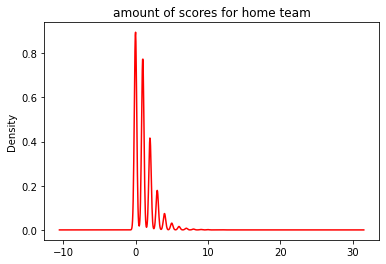

In [191]:
df.away_score.plot.density(color='red')
plt.title('amount of scores for home team')
plt.show()

Here it shows a density plot for  most home teams scores. Most home teams scored from 0 to 10 and it's highest denisty is more than 0.8

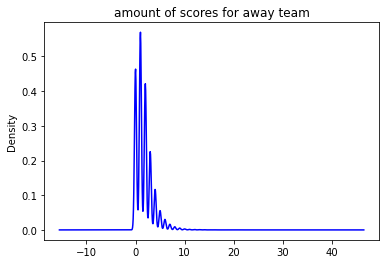

In [192]:
df.home_score.plot.density(color='blue')
plt.title('amount of scores for away team')
plt.show()

Here it shows a density plot for most away teams scores. Most away teams scored from 0 to 10 and it's highest denisty is more than 0.5

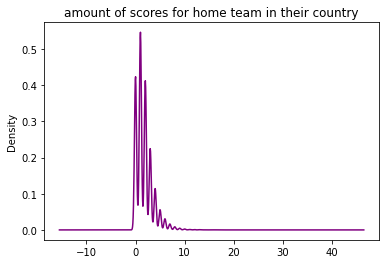

In [193]:
df[df["home_team"]==df["country"]].home_score.plot.density(color="purple")
plt.title('amount of scores for home team in their country')
plt.show()

Here it shows a density plot for most home teams scores in their own country. Most home teams scored from 0 to 10 and it's highest denisty is more than 0.5

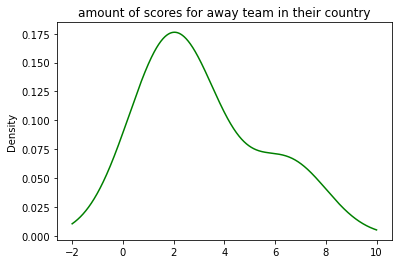

In [194]:
df[df["away_team"]==df["country"]].away_score.plot.density(color="green")
plt.title('amount of scores for away team in their country')
plt.show()

Here it shows a density plot for most away teams scores in their own country. Most home teams scored from 0 to 10 and it's peak density is at 2 goals with a peak of 0.175. There is also a saddle point at 0.075 with a goal of 6.

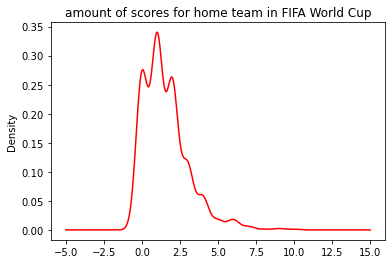

In [195]:
df[df["tournament"]=="FIFA World Cup"].home_score.plot.density(color='red')
plt.title('amount of scores for home team in FIFA World Cup')
plt.show()

Here it shows a density plot for the tournament FIFA World Cup as a home team. Most of the goals are clumped between 0 and 2.5 goals with a highest peak of just below 0.35

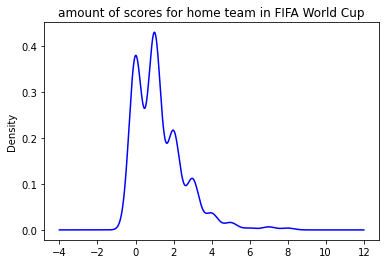

In [196]:
df[df["tournament"]=="FIFA World Cup"].away_score.plot.density(color='blue')
plt.title('amount of scores for home team in FIFA World Cup')
plt.show()

Here it shows a density plot for the tournament FIFA World Cup as an away team. Most of the goals are clumped between 0 and 2 goals with a highest peak of just above 0.4

In [287]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,YaoundÃ©,Cameroon,True
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,YaoundÃ©,Cameroon,False
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,YaoundÃ©,Cameroon,False


In [217]:
df["neutral"].value_counts()

False    32481
True     10707
Name: neutral, dtype: int64

In [213]:
array=[]
x=df["neutral"].value_counts()
for i in range(len(x)):
        array.append(df["neutral"].value_counts()[i])

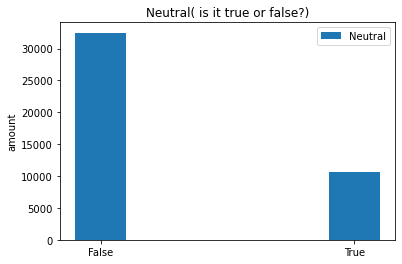

In [221]:
array2=["False","True"]
ypos= np.arange(len(array2))
plt.xticks(ypos,array2)
plt.ylabel("amount")
plt.title("Neutral( is it true or false?)")
plt.bar(ypos,array,width=0.2,label="Neutral")
plt.legend()
plt.show() 

It is clear in this Graph that there is much more countries with False than True. That is because it is more common to play on one team's country rather than none. 

In [280]:
mean_homescore=[np.mean(df[df["tournament"]!="Friendly"]["home_score"]),np.mean(df[df["tournament"]=="Friendly"]["home_score"])]
mean_awayscore=[np.mean(df[df["tournament"]!="Friendly"]["away_score"]),np.mean(df[df["tournament"]=="Friendly"]["away_score"])]
match_type=["Official","Friendly"]
df9=pd.DataFrame(match_type)
df9=df9.assign(mean_homescore= mean_homescore)
df9=df9.assign(mean_awayscore=mean_awayscore)
df9.columns=["Typematch","mean_homescore","mean_awayscore"]
df9

,Typematch,mean_homescore,mean_awayscore
0,Official,1.774506,1.172700
1,Friendly,1.694605,1.197615


([<matplotlib.axis.YTick at 0x21924b7b400>,
 [Text(0, 0, 'Official'), Text(0, 1, 'Friendly')])

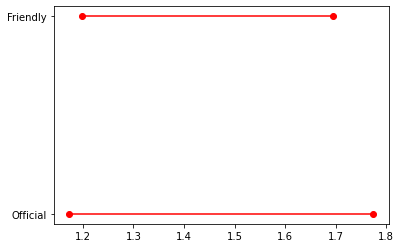

In [286]:
import matplotlib.pyplot as plt
for mean_homescore,mean_awayscore,y in zip(df9['mean_homescore'],df9['mean_awayscore'],range(len(df9))):
    plt.plot((mean_homescore,mean_awayscore),(y,y),'ro-')
plt.yticks(range(len(df9)),list(df9['Typematch']))

In [242]:
mean_homescore=[np.mean(df[df["tournament"]!="Friendly"]["home_score"]),df[df["tournament"]=="Friendly"]["home_score"]]

Here in this graph, it shows the confidence interval of how many scores were scored, while comparing Friendly matches and all other matches, the officals scored more. 

In [247]:
mean_homescore=[np.mean(df[df["tournament"]!="Friendly"]["home_score"]),df[df["tournament"]=="Friendly"]["home_score"]]


KeyError: 'tournament'

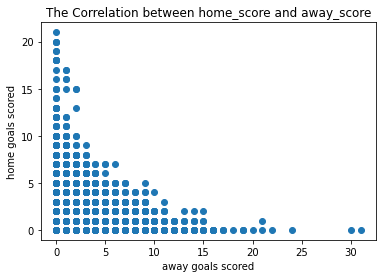

In [289]:
plt.scatter(df['home_score'],df['away_score'])
plt.ylabel("home goals scored")
plt.xlabel("away goals scored")
plt.title('The Correlation between home_score and away_score')
plt.show()

In this graph, it shows the correlation between the home goals scored and the away goals scored, there appears to be a exponetional negative corelation.  

In [310]:
df["neutral"]==df["neutral"]=="false"

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

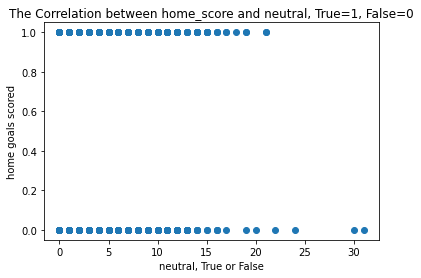

In [337]:
conditions=[df["neutral"]==True,df["neutral"]==False]
choices=[1,0]
df['Neutral'] = np.select(conditions,choices)
plt.scatter(df['home_score'],df['Neutral'])
plt.ylabel("home goals scored")
plt.xlabel("neutral, True or False")
plt.title('The Correlation between home_score and neutral, True=1, False=0')
plt.show()

In [292]:
df[df["home_team"]==df["country"]]["home_score"]

0        0
1        4
2        2
3        2
4        3
        ..
43181    1
43182    1
43183    2
43185    0
43186    3
Name: home_score, Length: 31682, dtype: int64

In [294]:
df[df["away_team"]==df["country"]]["away_score"]

788      7
1618     2
1650     2
2755     1
3488     3
3528     6
3541     3
28990    1
Name: away_score, dtype: int64

Here in this graphs, it shows that most scores were scored from home scores and if they were in one of the countries played at. 

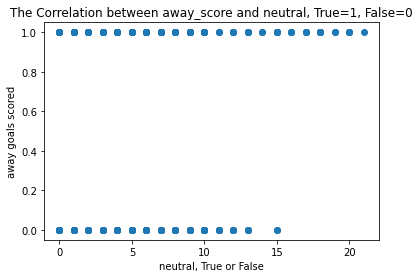

In [338]:
conditions=[df["neutral"]==True,df["neutral"]==False]
choices=[1,0]
df['Neutral'] = np.select(conditions,choices)
plt.scatter(df['away_score'],df['Neutral'])
plt.ylabel("away goals scored")
plt.xlabel("neutral, True or False")
plt.title('The Correlation between away_score and neutral, True=1, False=0')
plt.show()

Here in this graphs, it shows that most scores were scored from home scores and if they were in one of the countries played at. 

# Part 1d: Description of the results.

To conclude, all of this, it appears playing as a home team yielded more goals and winning in general. 

# Part 2a:  reported number of confirmed cases and deaths.

In [340]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [341]:
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


ValueError: x and y must be the same size

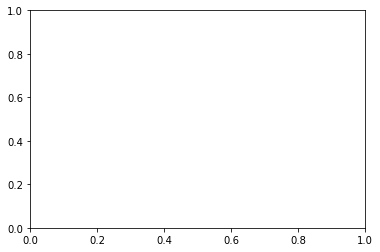

In [342]:
statistics.mean(df["dcases"])

2353.722996019309

In [343]:
statistics.median(df["dcases"])

98

In [344]:
statistics.stdev(df["dcases"])

12256.414468539499

The mean of the daily reported cases is 2353.72, however it is so spread out since the standard deviation is bigger than the mean and the median is 98 which is much smaller than the mean. 

In [345]:
statistics.mean(df["ddeaths"])

44.293024429556425

In [346]:
statistics.median(df["ddeaths"])

1

In [347]:
statistics.stdev(df["ddeaths"])

197.94510823044232

For the daily confirmed deaths, it's mean is 44.29 with a median of 1. It's standard deviation is also high with it being bigger than the mean at 197.95.

In [348]:
df[df["dcases"]==max(df["dcases"])]

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
112999,2020-12-10,TUR,Turkey,Upper middle income,Europe & Central Asia,Asia,823225,220,83429615,Thu,Dec


The country with the biggest amount of confirmed cases in a day which is 823225 was Turkey in 2020-12-10 in Thursday. 

In [349]:
df[df["ddeaths"]==max(df["ddeaths"])]

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
33884,2021-07-20,ECU,Ecuador,Upper middle income,Latin America & Caribbean,South America(continent),1634,8786,17373662,Tue,Jul


The country with the biggest amount of confirmed deaths in a day which is 823225 was Ecuador in 2021-07-20 in Tuesday. 

In [350]:
cats=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekdays'] = df['weekdays'].astype(cat_type)

In [351]:
df.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})

dcases                     
                 mean           std   size
weekdays                                  
Fri       2643.215039  13626.207863  17634
Sat       2174.297447  10922.667935  17472
Sun       1852.340706   9559.968071  17496
Mon       2116.600879  11700.105447  17521
Tue       2388.510716  11756.420050  17544
Wed       2601.990272  12848.605924  17578
Thu       2693.674338  14618.890740  17598

In [352]:
df.groupby("weekdays").agg({"ddeaths": [np.mean, np.std, np.size]})

ddeaths                   
               mean         std   size
weekdays                              
Fri       47.990756  208.404740  17634
Sat       40.258413  177.949619  17472
Sun       31.856367  139.320870  17496
Mon       37.954968  155.752300  17521
Tue       50.840002  230.863861  17544
Wed       51.346968  226.105877  17578
Thu       49.695534  224.874945  17598

Here it shows all the weekdays of confirmed daily cases and deaths, it shows it's mean, standard deviation and the size.

The day with the biggest mean is Thursday while the lowest is Sunday for daily confirmed cases and deaths

In [353]:
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

In [354]:
df.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})

dcases                     
              mean           std   size
month                                  
Jan    3330.493183  16114.132615   5868
Feb    1869.261968   7579.872208   6058
Mar    1599.375677   6590.844635   9785
Apr    2294.984731  14842.094035  10872
May    1989.523264  16428.338523  11348
Jun    1433.149046   6561.947273  11010
Jul    2007.870352   7408.384725  11377
Aug    2441.502152  10425.483877  11387
Sep    2223.283062  10260.530149  11040
Oct    2205.899580   7917.525038  11432
Nov    2964.868421  11235.400964  11134
Dec    3979.827003  20864.089717  11532

In [355]:
df.groupby("month").agg({"ddeaths": [np.mean, np.std, np.size]})

ddeaths                   
            mean         std   size
month                              
Jan    71.127812  289.935659   5868
Feb    51.762133  222.814231   6058
Mar    34.963413  171.864116   9785
Apr    52.986479  240.192244  10872
May    46.761720  254.388290  11348
Jun    38.822434  201.438666  11010
Jul    39.192142  175.788522  11377
Aug    42.456749  157.551906  11387
Sep    39.211051  168.449391  11040
Oct    35.094822  143.726925  11432
Nov    44.249506  150.833802  11134
Dec    50.099723  203.325567  11532

Here it shows all the months of confirmed daily cases and deaths, it shows it's mean, standard deviation and the size.

The month with the biggest mean is December while the lowest is June for daily confirmed cases and for deaths, the biggest mean is january while the lowest is March. 

# Part 2b: ratio between the confirmed cases and deaths.

In [95]:
fatality= df['ddeaths']/df['dcases']
fatality

0         0.000000
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
122838    0.015483
122839    0.015245
122840         NaN
122841    0.013636
122842    0.004575
Length: 122843, dtype: float64

According to the median, for every 98 confirmed cases, there was 1 death. 

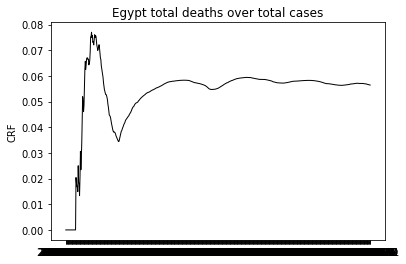

In [370]:
df['totcases'] = df.groupby(['iso3c'])['dcases'].cumsum()
df['totdeaths'] = df.groupby(['iso3c'])['ddeaths'].cumsum()
df['totdeaths'].loc[df['iso3c']=='EGY']
df['cfr']=df['totdeaths']/df['totcases']
df_egy=df.loc[df['iso3c']=='EGY']
plt.plot( 'date', 'cfr', data=df_egy,  color='black', markersize=4,     linewidth=1)
plt.xlabel("")
plt.ylabel("CRF")
plt.title("Egypt total deaths over total cases")
plt.show()

In [417]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

Here in this graph it shows the fatality rate for Egypt from 2020 to 2021

In [420]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df['year'] = pd. DatetimeIndex(df['date']). year
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)
dfegy=df[df['country']=='Egypt']
stats=dfegy.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})
stats=pd.DataFrame(stats)
stats.columns=['mean','std','size']

plt.plot( 'month', 'mean', data=statsm, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsm, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.show()

NameError: name 'statsm' is not defined

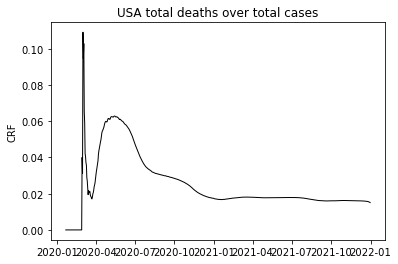

In [380]:
df['totcases'] = df.groupby(['iso3c'])['dcases'].cumsum()
df['totdeaths'] = df.groupby(['iso3c'])['ddeaths'].cumsum()
df['totdeaths'].loc[df['iso3c']=='USA']
df['cfr']=df['totdeaths']/df['totcases']
df_usa=df.loc[df['iso3c']=='USA']
plt.plot( 'date', 'cfr', data=df_usa,  color='black', markersize=4,     linewidth=1)
plt.xlabel("")
plt.ylabel("CRF")
plt.title("USA total deaths over total cases")
plt.show()

In [421]:
ci_dcases=statsm=dfegy.groupby("month").agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsm

NameError: name 't' is not defined

Here it shows for the United states, it is clear that Amercia cases dropped significantly and stayed relatively stable. 

# Part 2c: Analysis of CoronaVirus Pandemic Over the Period Between 2020 and 2021

In [406]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df['year'] = pd. DatetimeIndex(df['date']). year
df20=df[df["year"]==2020]
df20

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,2020
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,2020
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,2020
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,2020
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
122473,2020-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,114,8,14645468,Sun,Dec,2020
122474,2020-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,71,5,14645468,Mon,Dec,2020
122475,2020-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,177,5,14645468,Tue,Dec,2020
122476,2020-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,300,1,14645468,Wed,Dec,2020


In [407]:
df21=df[df["year"]==2021]
df21

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year
312,2021-01-01,AFG,Afghanistan,Low income,South Asia,Asia,183,12,38041754,Fri,Jan,2021
313,2021-01-02,AFG,Afghanistan,Low income,South Asia,Asia,73,10,38041754,Sat,Jan,2021
314,2021-01-03,AFG,Afghanistan,Low income,South Asia,Asia,123,10,38041754,Sun,Jan,2021
315,2021-01-04,AFG,Afghanistan,Low income,South Asia,Asia,200,9,38041754,Mon,Jan,2021
316,2021-01-05,AFG,Afghanistan,Low income,South Asia,Asia,102,7,38041754,Tue,Jan,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,2021
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,2021
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec,2021
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,2021


Here I seperated the Covid cases by years, 2020 and 2021

# 2020 cases and deaths

In [390]:
np.mean(df20["dcases"])

1525.5225808799446

In [391]:
np.mean(df20["ddeaths"])

34.27551948760872

## Region 

In [392]:
x=np.unique(df20["region"])
x

array(['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America(region)', 'South Asia', 'Sub-Saharan Africa'],
      dtype=object)

In [393]:
array=[]
for i in range(len(x)):
    array.append(np.mean(df20[df20["region"]==x[i]]["dcases"]))

In [394]:
array2=[]
for i in range(len(x)):
    array2.append(np.mean(df20[df20["region"]==x[i]]["ddeaths"]))

In [395]:
df=pd.DataFrame(x)
df=df.assign(dcases=array)
df=df.assign(ddeaths=array2)
df.columns=["region","dcases","ddeaths"]
df

,region,dcases,ddeaths
0,East Asia & Pacific,309.256309,7.110776
1,Europe & Central Asia,1721.858350,36.913612
2,Latin America & Caribbean,1601.753333,57.772410
3,Middle East & North Africa,762.715511,17.696025
4,North America(region),30164.552975,534.744557
5,South Asia,4586.009052,67.306966
6,Sub-Saharan Africa,135.919003,3.070567


The region with the highest average daily cases and deaths in 2020 is North America (region).

## Income

In [396]:
x=np.unique(df20["income"])
x

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

In [397]:
array=[]
for i in range(len(x)):
    array.append(np.mean(df20[df20["income"]==x[i]]["dcases"]))

In [398]:
array2=[]
for i in range(len(x)):
    array2.append(np.mean(df20[df20["income"]==x[i]]["ddeaths"]))

In [399]:
df=pd.DataFrame(x)
df=df.assign(dcases=array)
df=df.assign(ddeaths=array2)
df.columns=["income","dcases","ddeaths"]
df

,income,dcases,ddeaths
0,High income,2321.685027,47.046627
1,Low income,77.125254,1.260807
2,Lower middle income,1214.800373,20.829490
3,Upper middle income,1643.653786,48.189750


The income based regions with the highest average daily cases are High income and with daily deaths it's the upper middle class. The lowest are the low income for bother dcases and deaths. 

## Continent

In [400]:
x=np.unique(df20["continent"])
x

array(['Africa', 'Asia', 'Europe', 'North America(continent)', 'Oceania',
       'South America(continent)'], dtype=object)

In [401]:
array=[]
for i in range(len(x)):
    array.append(np.mean(df20[df20["continent"]==x[i]]["dcases"]))

In [402]:
array2=[]
for i in range(len(x)):
    array2.append(np.mean(df20[df20["continent"]==x[i]]["ddeaths"]))

In [403]:
df=pd.DataFrame(x)
df=df.assign(dcases=array)
df=df.assign(ddeaths=array2)
df.columns=["continent","dcases","ddeaths"]
df

,continent,dcases,ddeaths
0,Africa,179.989695,4.272372
1,Asia,1448.863760,23.643681
2,Europe,1783.304743,40.806310
3,North America(continent),3390.453029,75.146327
4,Oceania,21.459072,0.645975
5,South America(continent),3669.935090,115.997226


The continent with the highest average of daily cases and daily deaths is South America(continent). The lowest is the continent Oceania. 

# 2021 cases and deaths

In [404]:
np.mean(df21["dcases"])

3024.213360830817

In [405]:
np.mean(df21["ddeaths"])

52.40294615894528

## Region 

In [114]:
x=np.unique(df21["region"])
x

array(['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America(region)', 'South Asia', 'Sub-Saharan Africa'],
      dtype=object)

In [115]:
array=[]
for i in range(len(x)):
    array.append(np.mean(df21[df21["region"]==x[i]]["dcases"]))

In [116]:
array2=[]
for i in range(len(x)):
    array2.append(np.mean(df21[df21["region"]==x[i]]["ddeaths"]))

In [117]:
df=pd.DataFrame(x)
df=df.assign(dcases=array)
df=df.assign(ddeaths=array2)
df.columns=["region","dcases","ddeaths"]
df

,region,dcases,ddeaths
0,East Asia & Pacific,1902.043518,33.649572
1,Europe & Central Asia,4023.235026,58.366264
2,Latin America & Caribbean,2665.195766,82.644500
3,Middle East & North Africa,1620.897326,23.030659
4,North America(region),49657.521918,671.286301
5,South Asia,9507.577055,137.554452
6,Sub-Saharan Africa,304.006762,6.563859


The region with the highest average daily cases and deaths in 2021 is North America (region).

## Income

In [118]:
x=np.unique(df21["income"])
x

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

In [119]:
array=[]
for i in range(len(x)):
    array.append(np.mean(df21[df21["income"]==x[i]]["dcases"]))

In [120]:
array2=[]
for i in range(len(x)):
    array2.append(np.mean(df21[df21["income"]==x[i]]["ddeaths"]))

In [121]:
df=pd.DataFrame(x)
df=df.assign(dcases=array)
df=df.assign(ddeaths=array2)
df.columns=["income","dcases","ddeaths"]
df

,income,dcases,ddeaths
0,High income,4520.954339,53.128242
1,Low income,168.681058,3.580727
2,Lower middle income,2550.449589,46.477091
3,Upper middle income,3368.106393,82.858600


The income based regions with the highest average daily cases are High income and with daily deaths it's the upper middle class. The lowest are the low income for bother dcases and deaths. 

## Continent

In [122]:
x=np.unique(df21["continent"])
x

array(['Africa', 'Asia', 'Europe', 'North America(continent)', 'Oceania',
       'South America(continent)'], dtype=object)

In [123]:
array=[]
for i in range(len(x)):
    array.append(np.mean(df21[df21["continent"]==x[i]]["dcases"]))

In [124]:
array2=[]
for i in range(len(x)):
    array2.append(np.mean(df21[df21["continent"]==x[i]]["ddeaths"]))

In [125]:
df=pd.DataFrame(x)
df=df.assign(dcases=array)
df=df.assign(ddeaths=array2)
df.columns=["continent","dcases","ddeaths"]
df

,continent,dcases,ddeaths
0,Africa,361.298423,8.423779
1,Asia,3835.418999,54.900774
2,Europe,4145.443007,62.726219
3,North America(continent),4976.624658,84.664443
4,Oceania,151.743598,0.808537
5,South America(continent),6067.011416,176.879909


The continent with the highest average of daily cases and daily deaths is South America(continent). The lowest is the continent Oceania. 

# To conclude 

2021 had more cases and deaths overall, and when seprating the data it is also 2021 with more cases and deaths. 

# Part 2d: Description of the results

2021 had more deaths and cases overall than 2020. However the highest number of cases in one day is 2020 so that is an outlier 

# End of assignment-- THANK YOU!! 🥰👨‍💻

Hello Dcotor, I would like to apologize for my behavior in the office hours. I am just stressed and I am trying as much as possible to avoid getting a B however sometimes trying your best is not good enough and I was in the wrong in getting out my frustrations on you. I sincerely hope you consider me as a good student and I promised you that the behavior I did will not be done ever again. 

I dreaw a heart for you below( you have to run it twice in a row for it to work), I hope you enjoy. Thank you again and sincerly 

Ali Baligh, 

In [ ]:
import turtle
wn = turtle.Screen()
wn.setup(width=400, height=400)
red = turtle.Turtle()

def curve():
    for i in range(200):
        red.right(1)
        red.forward(1)

def heart():
    red.fillcolor('red')
    red.begin_fill()
    red.left(140)
    red.forward(113)
    curve()
    red.left(120)
    curve()
    red.forward(112)
    red.end_fill()

heart()
red.ht()
turtle.done()